## 5.2 Modelos de Regresión

En esta clase vamos a centrarnos en los modelos de regresión, como explicamos en la clase anterior los modelos de regresión son aquellos modelos en los que su objetivo es predecir el valor de una variable numérica.

Nos centraremos en el modelo de regresión mas simple que es la regresión y posteriormente veremos algún modelo más complejo.

### 1. Regresión lineal

Para poder aplicar una regresión lineal a nuestros datos se han de tener algunas suposiciones previas:

+ Exogeneidad débil (predictores libres de error)
+ Linealidad
+ Homocedasticidad: La homocedasticidad es una característica de un modelo de regresión lineal que implica que la varianza de los errores es constante a lo largo del tiempo.
+ Independencia de los errores
+ Falta de colinealidad (independencia lineal)

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n+\epsilon$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente:

$$\vec{\beta} = (X^{T}X)^{-1}X^{T}y$$

+ Minimos cuadrados

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y-\hat{y})^{2}$$

Ejemplo)

$y = \beta_0 + \beta_1x_1 + \epsilon$

Entonces, derivando MSE e igualando a 0:

$\beta_0 = \frac{\sum y - \beta_1\sum x}{n} = \bar{y} - \beta_1\bar{x}$

$\beta_1=\frac{\sum (x-\hat{x})(y-\hat{y})}{\sum (x-\hat{x})}$

Vamos a ver esto en forma de código, para ello importamos las librerías necesarias

In [1]:
#!pip install -U statsmodels #para actualizar la librería de statsmodels

In [2]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from statsmodels.api import add_constant, OLS
from statsmodels.formula.api import ols

import pylab as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Regularización**

Vamos a ver que es cada una de las librerías que hemos importado, cada una de ellas son diferentes métodos de regularización de una regresión lineal.

**Función de Coste o de Pérdida (J)** = Función a minimizar

En el caso de la regresión lineal: 
$$J=MSE$$


La regularización es una medida/penalización de la complejidad del modelo. Se añade un término a J que depende del tipo de regularización:

$$J = MSE + \alpha · T$$


+ Lasso (L1, norma 1):

$$T=\frac{1}{n}\sum_{i}  |\beta_i|$$

Muy útil si se sospecha que hay características irrelevantes. Se favorece $\beta \approx 0$

+ Ridge (L2):

$$T=\frac{1}{2n}\sum_{i}  \beta_{i}^{2}$$

Muy útil si se sospecha que existe correlación entre las características, minimiza esa correlación. Funciona mejor si todas son relevantes.

+ ElasticNet (L1+L2):

$$T=r·L1 + (1-r)·L2$$

Se usa cuando hay muchas características.

Vamos a cargar unos datos procedentes de las bases de datos que contiene sklearn y vamos a aplicale los diferentes modelos de regresión que hemos visto.

#### 1.1 Cargamos los datos

In [3]:
boston=load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)

df['price']=boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.2 Exploración de los datos

##### Búsqueda de valores nulos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


##### Descripción estadística de los datos

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### 1.3 Análisis de correlación y elección de variables

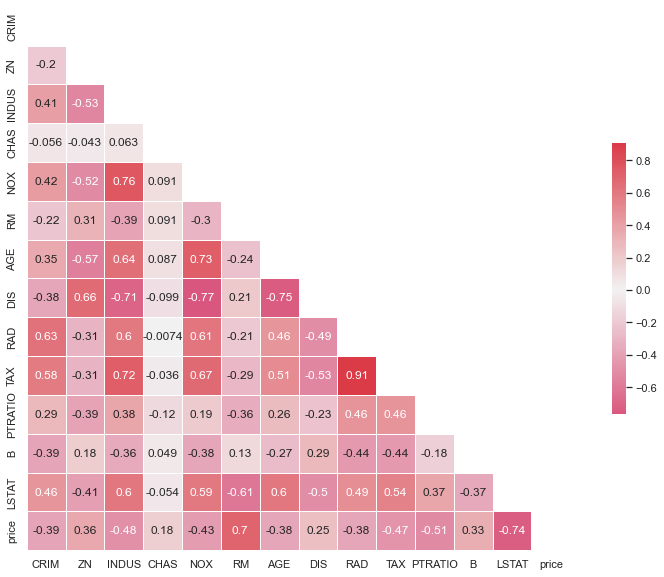

In [10]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Con ayuda de la librería de statsmodels y la técnica de ols (mínimos cuadrados) podemos ver la importancia de cada una de las variables independientes de nuestros datos respecto a la variable dependiente

Vamos a crear una función que recibe como parámetros la variable dependiente(y) y la variable independiente(x)

In [11]:
def plot_regression_model(x,y):
    
    x_const = add_constant(x) # add a constant to the model
    
    modelo = OLS(y, x_const).fit() # fit the model
    
    pred = modelo.predict(x_const) # make predictions
    
    print(modelo.summary());
    try:
        const = modelo.params[0] # create a variable with the value of the constant given by the summary
        coef = modelo.params[1] # create a variable with the value of the coef given by the summary

        x_l=np.linspace(x.min(), x.max(), 50) 
        y_l= coef*x_l + const # function of the line

        plt.figure(figsize=(10, 10));

        # plot the line
        plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}');

        # data
        plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}');

        plt.title('Regresion lineal')
        plt.xlabel(f'{x.name}')
        plt.ylabel(f'{y.name}')
        plt.legend()
        plt.show();
        return modelo
    except:
        print('No se puede imprimir la recta de regresión para modelos multivariable')
        plt.show();
        return modelo

Separamos nuestras variables independientes de nuestra variable dependiente

In [12]:
X=df.drop('price', axis=1)

y=df.price

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.17e-19
Time:                        16:05:03   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

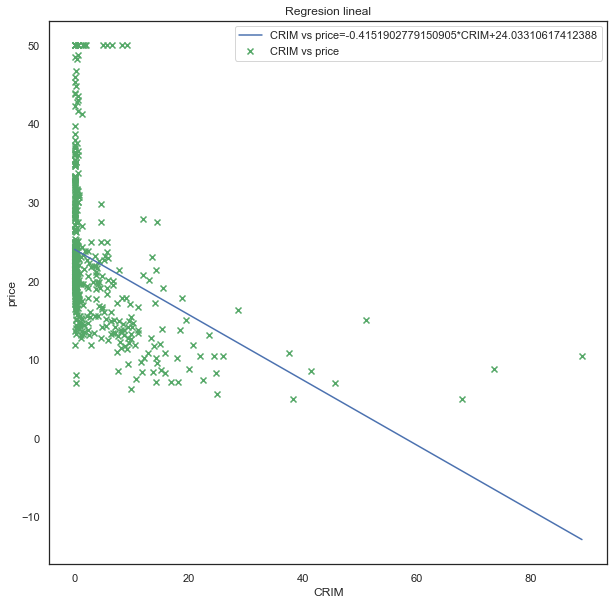

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           5.71e-17
Time:                        16:05:03   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.9176      0.425     49.248      0.0

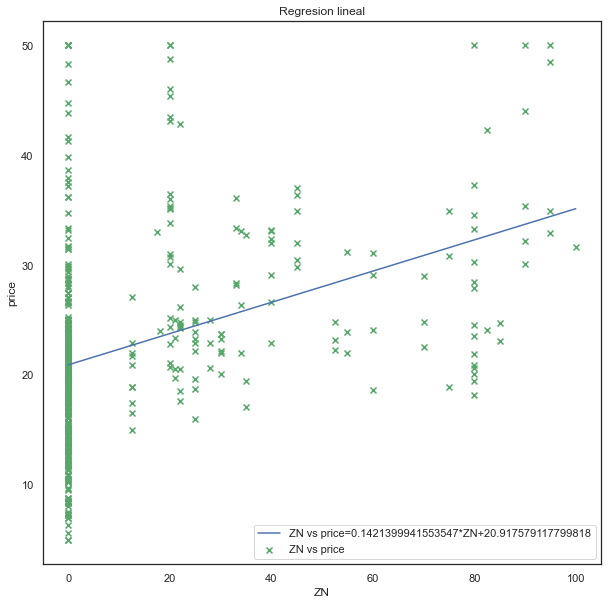

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           4.90e-31
Time:                        16:05:04   Log-Likelihood:                -1772.8
No. Observations:                 506   AIC:                             3550.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.7549      0.683     43.537      0.0

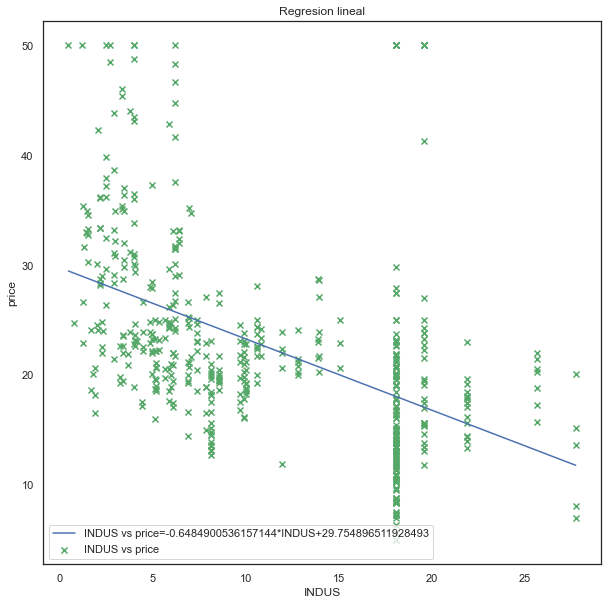

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           7.39e-05
Time:                        16:05:04   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.0

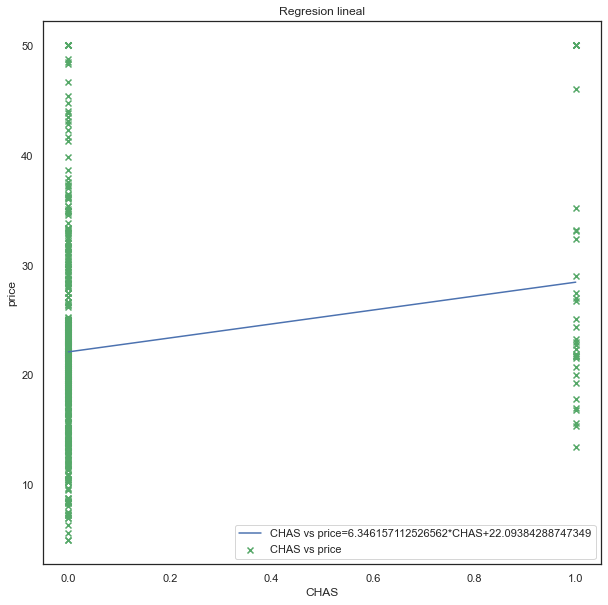

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           7.07e-24
Time:                        16:05:04   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.3459      1.811     22.828      0.0

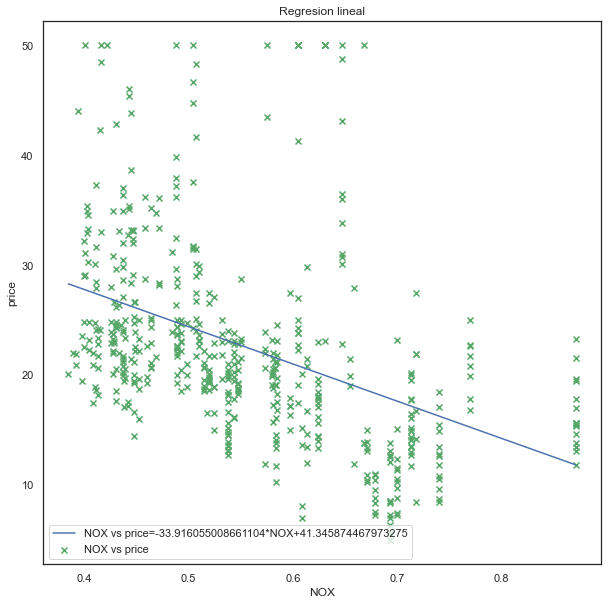

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.49e-74
Time:                        16:05:04   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

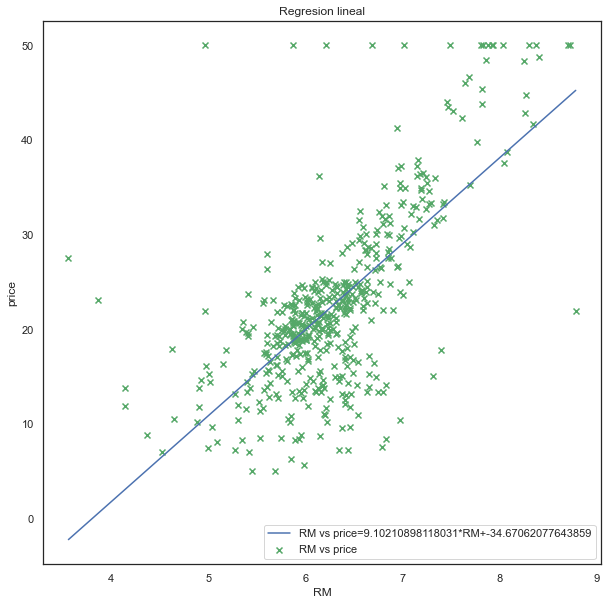

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.57e-18
Time:                        16:05:04   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.0

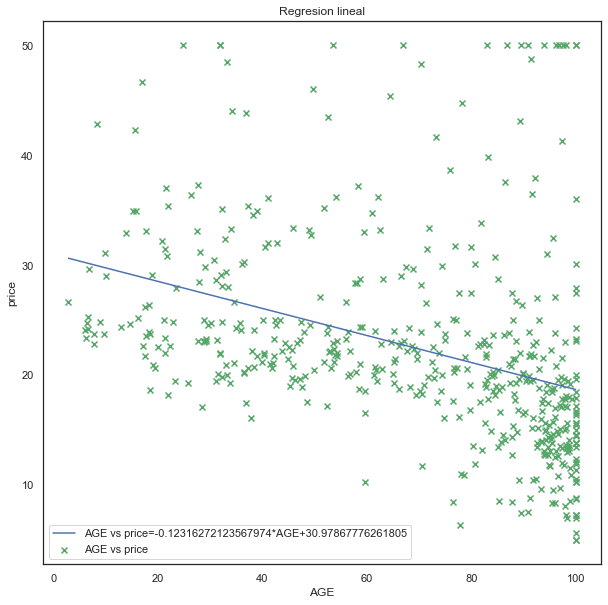

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        16:05:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

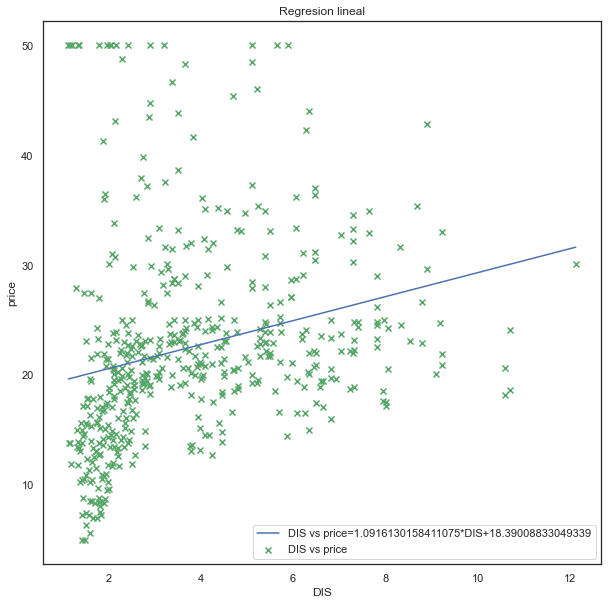

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           5.47e-19
Time:                        16:05:04   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.3821      0.562     46.964      0.0

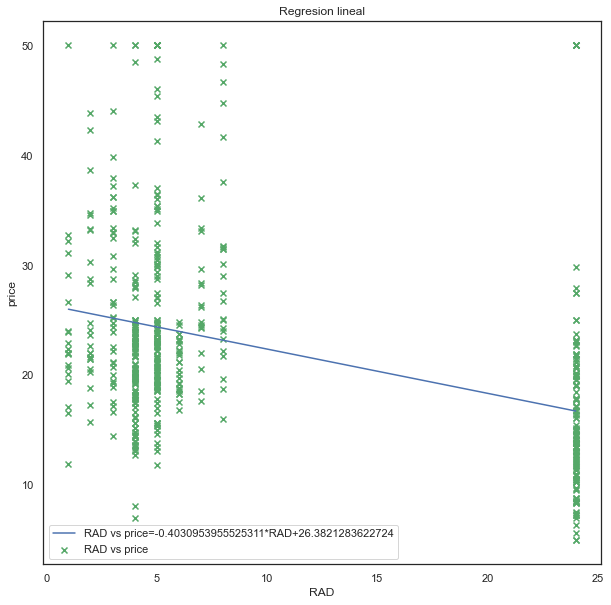

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           5.64e-29
Time:                        16:05:05   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9707      0.948     34.768      0.0

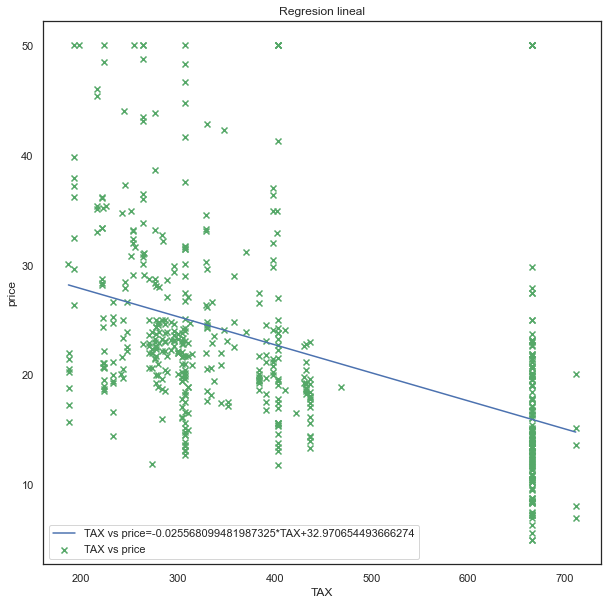

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.61e-34
Time:                        16:05:05   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.0

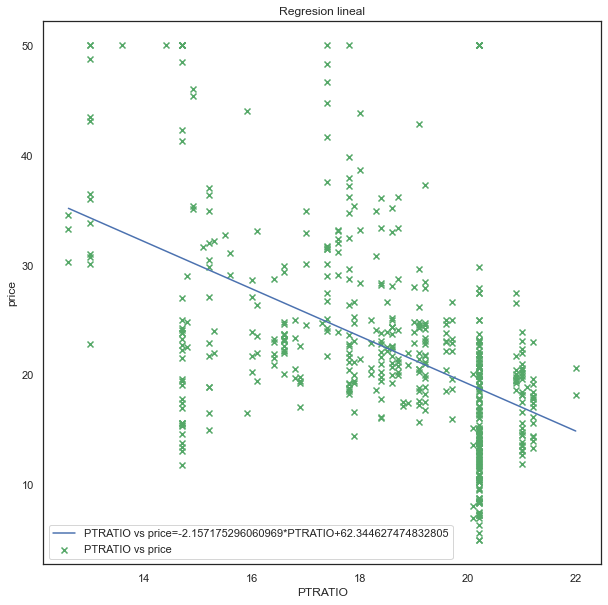

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     63.05
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.32e-14
Time:                        16:05:05   Log-Likelihood:                -1810.4
No. Observations:                 506   AIC:                             3625.
Df Residuals:                     504   BIC:                             3633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5510      1.557      6.775      0.0

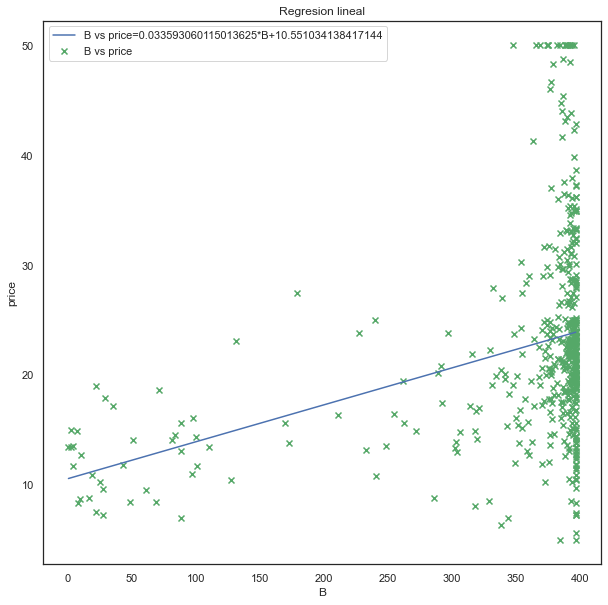

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           5.08e-88
Time:                        16:05:05   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

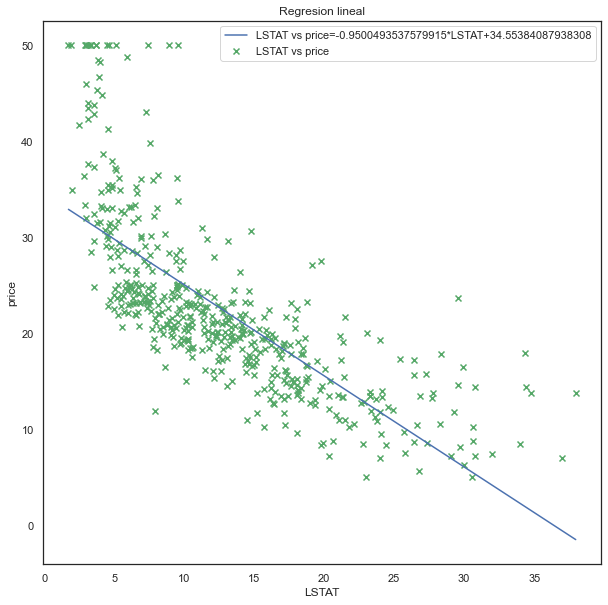

In [13]:
for c in X:
    plot_regression_model(X[c], y)

Como podemos ver predecir el precio de una casa a través de una regresión lineal con una única variable es bastante complicado, vamos a ver como se comportaría de forma multivariable

In [14]:
multi = plot_regression_model(X,y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        16:05:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

<Figure size 720x720 with 0 Axes>

Si nos fijamos hay algunas variables en el summary en el que la columna P nos indica 0, está P se está refiendo al pvalue, este valor no indica el estadístico de la variable independiente respecto de la dependiente, cuando más cercano a 0 esté nos indica que la variable es dependiente la una de la otra.
Esto se basa en el testeo de hipótesis, para ello determinamos nuestra hipótesis inicial que es que las variables son independientes y establecemos un intervalo de confianza sobre el que apoyar nuestra hipótesis, normalmente es del 95%, esto quiere decir que si el pvalue es menor de 0.05 podremos descartar nuestra hipótesis inicial y determinar con un intervalo de confianza del 95% que la variable dependiente realmente depende de la independiente

Y los betas (pesos) de nuestra ecuación correspondería a la columna coef. Así quedaría la ecuación de cada una de las rectas de regresión

$$ y = coef * x + const $$

Del mismo modo prodríamos obtener estos valores con la librería de sklearn

In [15]:
ln = LinearRegression()

In [16]:
ln.fit(X,y)

LinearRegression()

Coeficientes

In [17]:
ln.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [18]:
dict(zip(X.columns, ln.coef_))

{'CRIM': -0.10801135783679726,
 'ZN': 0.04642045836688162,
 'INDUS': 0.020558626367072175,
 'CHAS': 2.686733819344969,
 'NOX': -17.766611228300405,
 'RM': 3.80986520680924,
 'AGE': 0.0006922246403435212,
 'DIS': -1.4755668456002555,
 'RAD': 0.3060494789851744,
 'TAX': -0.01233459391657437,
 'PTRATIO': -0.9527472317072883,
 'B': 0.009311683273793822,
 'LSTAT': -0.5247583778554833}

Ordenada en el origen

In [19]:
ln.intercept_

36.45948838508984

Una vez elegidas nuestras variables podemos pasar a realizar el train_test_split para después standarizar nuestros datos y entrenar nuestro modelo

In [20]:
X = X.drop(['INDUS', 'AGE'], axis=1)

#### 1.4 Train test split y estandarización

In [21]:
X_train ,X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 11), (102, 11), (404,), (102,))

In [23]:
sc = StandardScaler().fit(X_train)

In [24]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [25]:
X_train

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,0.0,0.6140,5.304,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,0.0,0.5380,5.834,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,0.0,0.4379,6.031,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,0.0,0.6140,6.103,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,0.0,0.5380,5.727,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,0.0,0.5200,5.836,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,0.0,0.4640,5.856,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,0.0,0.4350,6.635,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,0.0,0.7400,6.629,2.1247,24.0,666.0,20.2,109.85,23.27


In [26]:
X_train_sc

array([[ 1.28770177, -0.50032012, -0.27808871, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.27808871, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.27808871, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -0.27808871, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012, -0.27808871, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.27808871, ...,  1.15981657,
        -3.12158061, -0.25731635]])

#### 1.5 Entrenamiento de modelos

Primero declaramos los modelos

In [27]:
linreg=LinearRegression()
lasso=Lasso() # Favorece si nuestras betas son próximas a 0 L1
ridge=Ridge() # Favorece cuando hay sospechas de correlación entre caracteristicas L2
elastic=ElasticNet() # Mezcla de las anteriores, funciona bien cuando hay muchas características (L1+L2)

Entrenamos los modelos

In [28]:
linreg.fit(X_train_sc, y_train)
lasso.fit(X_train_sc, y_train)
ridge.fit(X_train_sc, y_train)
elastic.fit(X_train_sc, y_train)

ElasticNet()

#### 1.6 Evaluación de modelos

##### **MSE**

$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [29]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error as mse

print(f' MSE linreg en train: {mse(y_train, linreg.predict(X_train_sc))}\n')
print(f' MSE linreg en test: {mse(y_test, linreg.predict(X_test_sc))}\n')
print(f' MSE lasso en train: {mse(y_train, lasso.predict(X_train_sc))}\n')
print(f' MSE lasso en test: {mse(y_test, lasso.predict(X_test_sc))}\n')
print(f' MSE ridge en train: {mse(y_train, ridge.predict(X_train_sc))}\n')
print(f' MSE ridge en test: {mse(y_test, ridge.predict(X_test_sc))}\n')
print(f' MSE ElasticNet en train: {mse(y_train, elastic.predict(X_train_sc))}\n')
print(f' MSE ElasticNet en test: {mse(y_test, elastic.predict(X_test_sc))}\n')

 MSE linreg en train: 21.670914065631745

 MSE linreg en test: 24.088447893940387

 MSE lasso en train: 27.994173704431258

 MSE lasso en test: 27.577731254138367

 MSE ridge en train: 21.672015790518856

 MSE ridge en test: 24.119788087870344

 MSE ElasticNet en train: 29.447329033721974

 MSE ElasticNet en test: 28.460571288522114



##### **RMSE**



$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [31]:
print(f' RMSE linreg en train: {mse(y_train, linreg.predict(X_train_sc), squared=False)}\n')
print(f' RMSE linreg en test: {mse(y_test, linreg.predict(X_test_sc), squared=False)}\n')
print(f' RMSE lasso en train: {mse(y_train, lasso.predict(X_train_sc), squared=False)}\n')
print(f' RMSE lasso en test: {mse(y_test, lasso.predict(X_test_sc), squared=False)}\n')
print(f' RMSE ridge en train: {mse(y_train, ridge.predict(X_train_sc), squared=False)}\n')
print(f' RMSE ridge en test: {mse(y_test, ridge.predict(X_test_sc), squared=False)}\n')
print(f' RMSE ElasticNet en train: {mse(y_train, elastic.predict(X_train_sc), squared=False)}\n')
print(f' RMSE ElasticNet en test: {mse(y_test, elastic.predict(X_test_sc), squared=False)}\n')

 RMSE linreg en train: 4.655202902734933

 RMSE linreg en test: 4.9079983592031065

 RMSE lasso en train: 5.290952060303633

 RMSE lasso en test: 5.251450395284941

 RMSE ridge en train: 4.65532123386978

 RMSE ridge en test: 4.9111900887534725

 RMSE ElasticNet en train: 5.426539323889764

 RMSE ElasticNet en test: 5.334845010731063



##### **MAE**

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [32]:
from sklearn.metrics import mean_absolute_error as mae

print(f' MAE linreg en train: {mae(y_train, linreg.predict(X_train_sc))}\n')
print(f' MAE linreg en test: {mae(y_test, linreg.predict(X_test_sc))}\n')
print(f' MAE lasso en train: {mae(y_train, lasso.predict(X_train_sc))}\n')
print(f' MAE lasso en test: {mae(y_test, lasso.predict(X_test_sc))}\n')
print(f' MAE ridge en train: {mae(y_train, ridge.predict(X_train_sc))}\n')
print(f' MAE ridge en test: {mae(y_test, ridge.predict(X_test_sc))}\n')
print(f' MAE ElasticNet en train: {mae(y_train, elastic.predict(X_train_sc))}\n')
print(f' MAE ElasticNet en test: {mae(y_test, elastic.predict(X_test_sc))}\n')

 MAE linreg en train: 3.317183762456521

 MAE linreg en test: 3.149694285529647

 MAE lasso en train: 3.6827530484514264

 MAE lasso en test: 3.4737706864351776

 MAE ridge en train: 3.311927275753231

 MAE ridge en test: 3.1490935748989646

 MAE ElasticNet en train: 3.7780239907933213

 MAE ElasticNet en test: 3.4524492343457247



##### **R2 score**

$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

pertenecen al intervalo (-$\infty$, 1]

In [33]:
print(f' R2 linreg en train: {linreg.score(X_train_sc, y_train)}\n')
print(f' R2 linreg en test: {linreg.score(X_test_sc, y_test)}\n')
print(f' R2 lasso en train: {lasso.score(X_train_sc, y_train)}\n')
print(f' R2 lasso en test: {lasso.score(X_test_sc, y_test)}\n')
print(f' R2 ridge en train: {ridge.score(X_train_sc, y_train)}\n')
print(f' R2 ridge en test: {ridge.score(X_test_sc, y_test)}\n')
print(f' R2 ElasticNet en train: {elastic.score(X_train_sc, y_train)}\n')
print(f' R2 ElasticNet en test: {elastic.score(X_test_sc, y_test)}\n')

 R2 linreg en train: 0.7505460462064875

 R2 linreg en test: 0.6715231799608918

 R2 lasso en train: 0.6777589864182232

 R2 lasso en test: 0.6239423350920313

 R2 ridge en train: 0.7505333642481608

 R2 ridge en test: 0.6710958163014793

 R2 ElasticNet en train: 0.661031711266384

 R2 ElasticNet en test: 0.6119036811955908



### 2. Otros Modelos

#### 2.1 Decission Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt = DecisionTreeRegressor(criterion='squared_error')

In [35]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

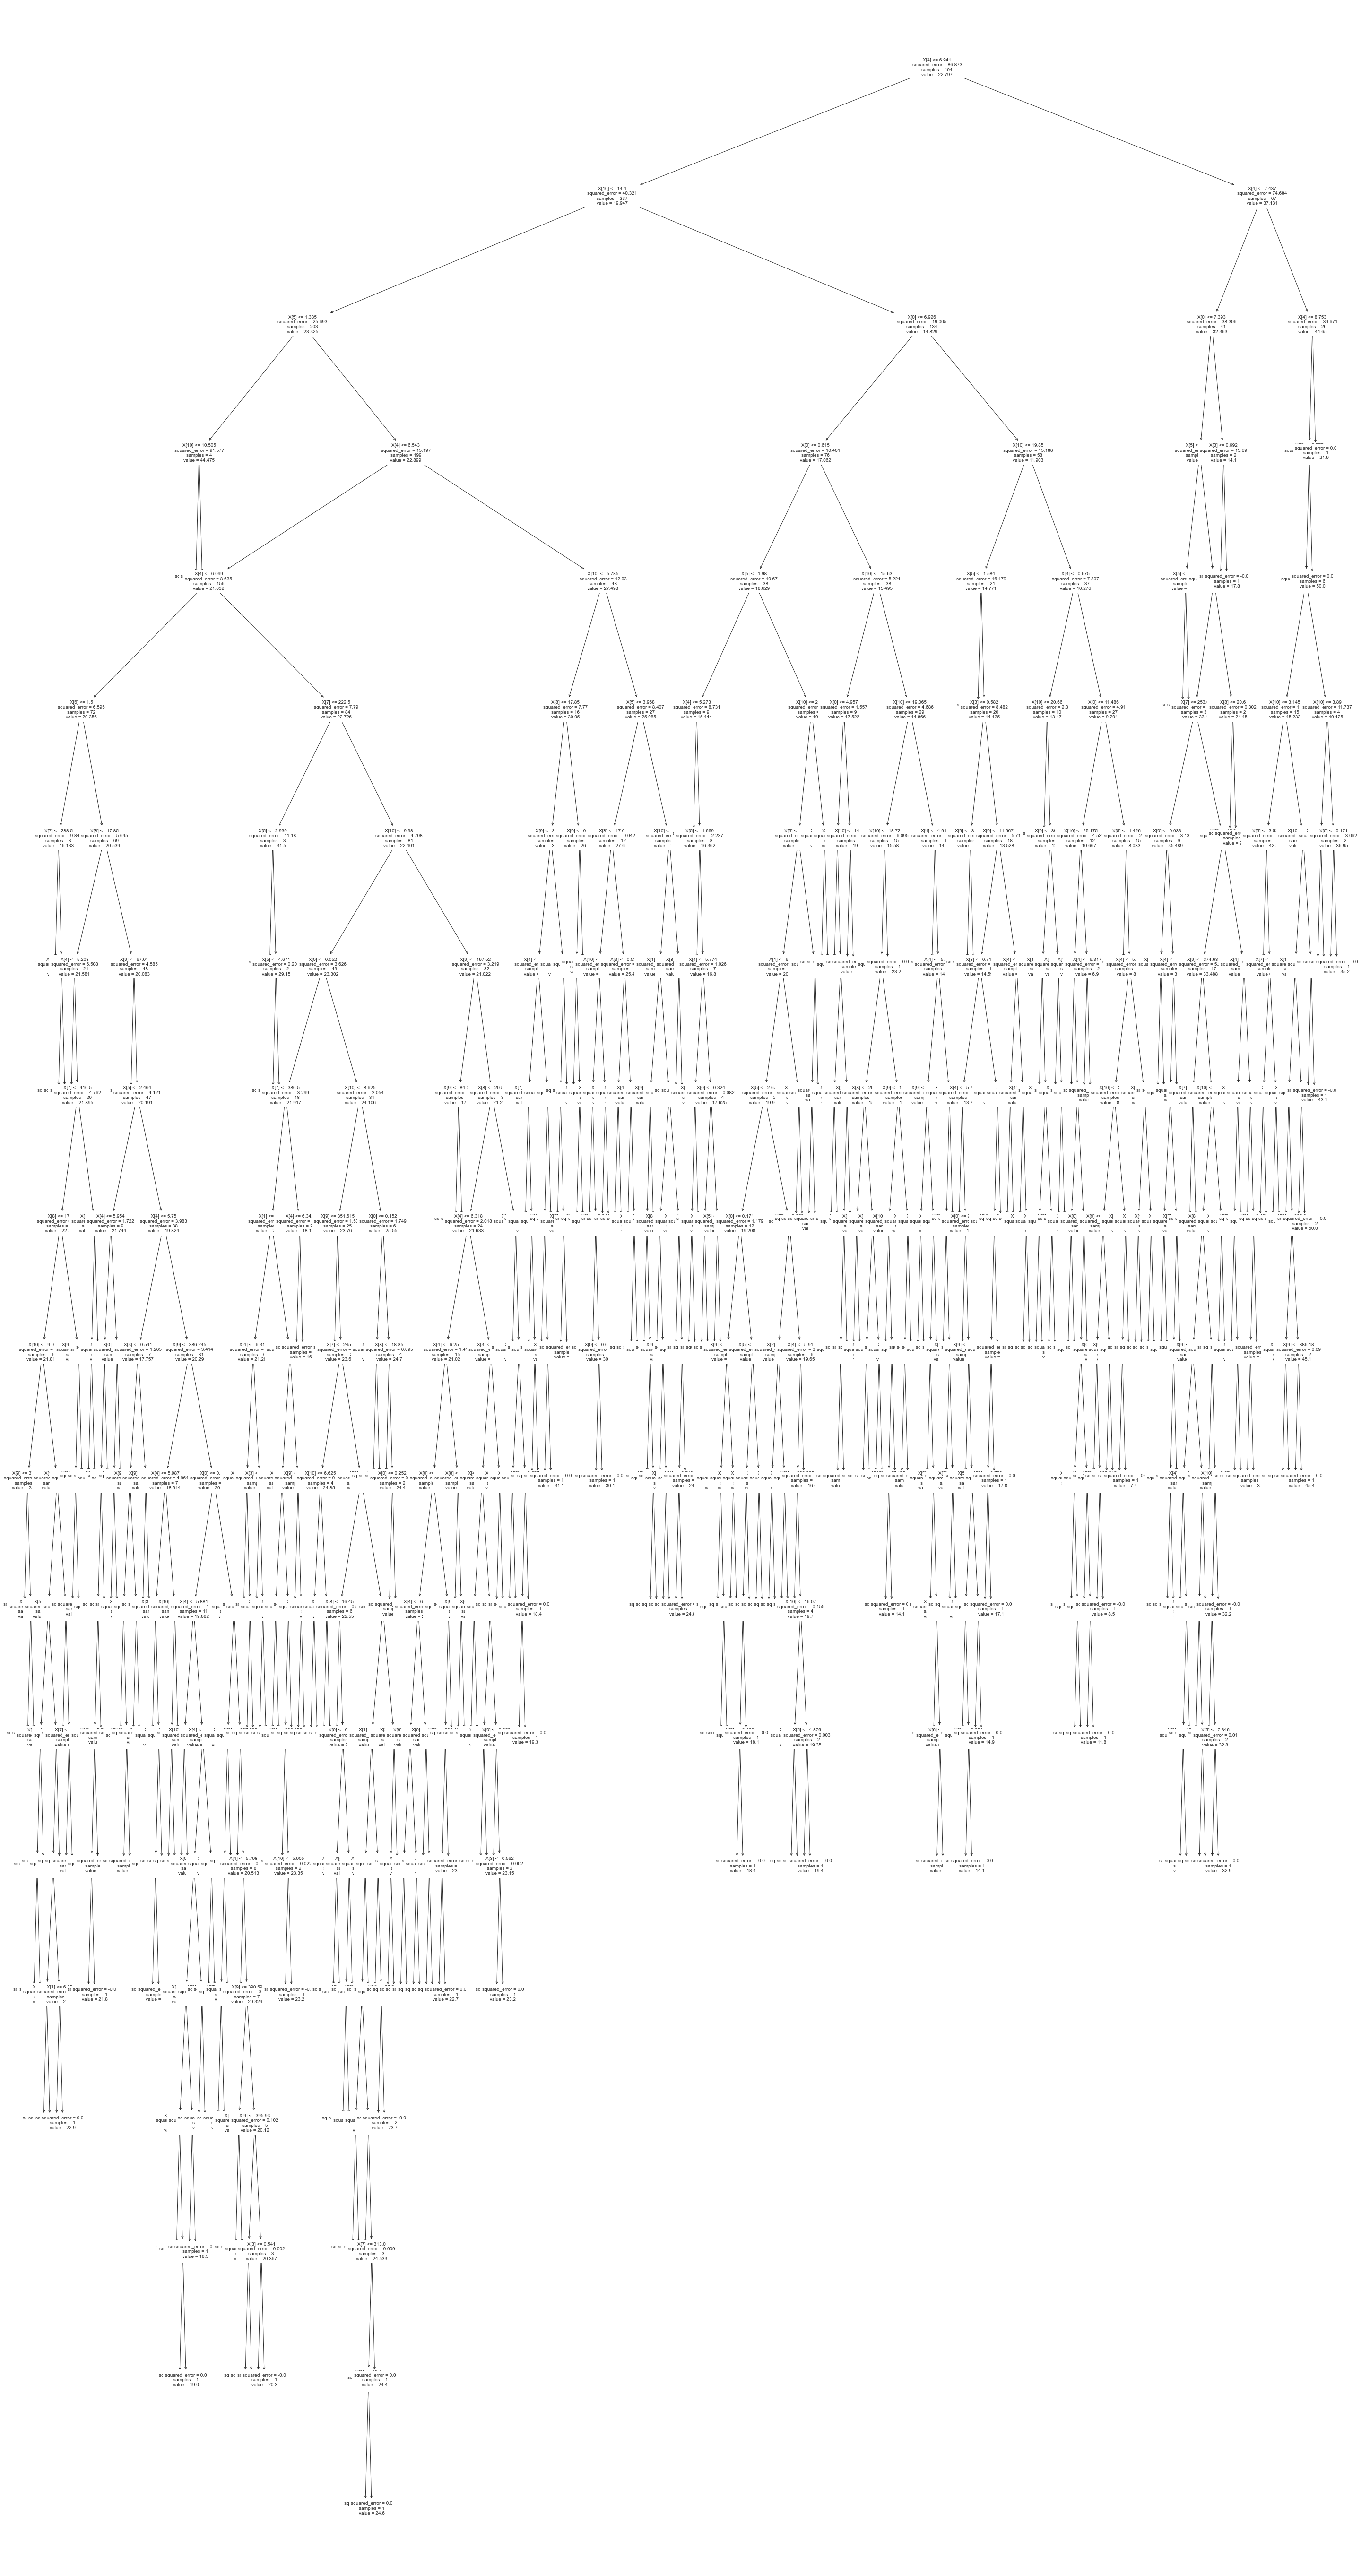

In [36]:
plt.figure(figsize=(50, 100))
plot_tree(dt, fontsize=10);

In [37]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.8278820718149102)

In [38]:
mse(y_train, dt.predict(X_train)), mse(y_test, dt.predict(X_test)) 

(0.0, 12.622058823529413)

In [39]:
mse(y_train, dt.predict(X_train), squared=False), mse(y_test, dt.predict(X_test), squared=False) 

(0.0, 3.552753695871614)

In [40]:
mae(y_train, dt.predict(X_train)), mae(y_test, dt.predict(X_test)) 

(0.0, 2.7284313725490192)

#### 2.2 Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()

In [43]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9802892009534001, 0.871897442867211)

In [45]:
mse(y_train, rf.predict(X_train)), mse(y_test, rf.predict(X_test)) 

(1.7123442054455444, 9.394245147058827)

In [46]:
mse(y_train, rf.predict(X_train), squared=False), mse(y_test, rf.predict(X_test), squared=False) 

(1.3085657054368895, 3.0650032866309993)

In [47]:
mae(y_train, rf.predict(X_train)), mae(y_test, rf.predict(X_test)) 

(0.8712648514851488, 2.072480392156863)

In [48]:
dict(zip(rf.feature_names_in_,rf.feature_importances_))

{'CRIM': 0.03821647230957749,
 'ZN': 0.001520432038011364,
 'CHAS': 0.0007818373412153091,
 'NOX': 0.02279725803908556,
 'RM': 0.4581327252251728,
 'DIS': 0.06537927505078744,
 'RAD': 0.006634648296760583,
 'TAX': 0.017725651006515256,
 'PTRATIO': 0.01860427045411181,
 'B': 0.016437604772836793,
 'LSTAT': 0.3537698254659255}

#### 2.3 SVR

In [49]:
from sklearn.svm import SVR

In [50]:
svr = SVR()

In [51]:
svr.fit(X_train, y_train)

SVR()

In [52]:
svr.score(X_train, y_train), svr.score(X_test, y_test)

(0.18860469793410484, 0.26897432687423073)

In [53]:
mse(y_train, svr.predict(X_train)), mse(y_test, svr.predict(X_test)) 

(70.48867174453508, 53.60887819763429)

In [54]:
mse(y_train, svr.predict(X_train), squared=False), mse(y_test, svr.predict(X_test), squared=False) 

(8.395753196976141, 7.321808396675939)

In [55]:
mae(y_train, svr.predict(X_train)), mae(y_test, svr.predict(X_test)) 

(5.581437656234678, 4.640159683238502)